<a href="https://colab.research.google.com/github/arvindraj07/Data-Science/blob/main/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [1]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=6601e0941a5679a5852b9af2f6c2f3bee27fa4c71120a45b2f1b45277d63a325
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [5]:
tesla_share_price_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [6]:
tesla_share_price_data.reset_index(inplace=True)

In [54]:
tesla_share_price_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...,...
2802,2021-08-16,705.070007,709.500000,676.400024,686.169983,22677400,0,0.0
2803,2021-08-17,672.659973,674.580017,648.840027,665.710022,23721300,0,0.0
2804,2021-08-18,669.750000,695.770020,669.349976,688.989990,20349400,0,0.0
2805,2021-08-19,678.210022,686.549988,667.590027,673.469971,14313500,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). Save the text of the response as a variable named `html_data`.


In [7]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Tesla revenue for the quarter ending June 30, 2021</b></h3>
<p>$11.958B</p>
<p>98.11%</p>
<h3>Tesla revenue for the twelve months ending June 30, 2021</h3>
<p>$41.862B</p>
<p>62.84% increase</p>
<h3>Tesla annual revenue for 2020 </h3>
<p>$31.536B</p>
<p>28.31% increase</p>
<h3>Tesla annual revenue for 2019 </h3>
<p>$24.578B </p>
<p>14.52%increase</p>
<h3>Tesla annual revenue for 2018 </h3>
<p>$21.461B</p>
<p>82.51% increase</p>
</body>
</html>

In [8]:
html_data="<html><head><title>Page Title</title></head><body><h3><b id='boldest'>Tesla revenue for the quarter ending June 30, 2021</b></h3><p>$11.958B</p<p>98.11%</p><h3>Tesla revenue for the twelve months ending June 30, 2021</h3><p>$41.862B</p><p>62.84% increase</p><h3>Tesla annual revenue for 2020 </h3><p>$31.536B</p><p>28.31% increase</p><h3>Tesla annual revenue for 2019 </h3><p>$24.578B </p><p>14.52%increase</p><h3>Tesla annual revenue for 2018 </h3><p>$21.461B</p><p>82.51% increase</p></body></html>"

Parse the html data using `beautiful_soup`.


In [10]:
soup = BeautifulSoup(html_data, 'html5lib')

In [11]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


In [12]:
print("tag object type:",type(tag_object))

tag object type: <class 'bs4.element.Tag'>


In [13]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b></h3>

In [14]:
tag_child =tag_object.b
tag_child

<b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b>

In [15]:
parent_tag=tag_child.parent
parent_tag

<h3><b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b></h3>

In [16]:
tag_object

<h3><b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b></h3>

In [17]:
tag_object.parent

<body><h3><b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b></h3><p>$11.958B98.11%</p><h3>Tesla revenue for the twelve months ending June 30, 2021</h3><p>$41.862B</p><p>62.84% increase</p><h3>Tesla annual revenue for 2020 </h3><p>$31.536B</p><p>28.31% increase</p><h3>Tesla annual revenue for 2019 </h3><p>$24.578B </p><p>14.52%increase</p><h3>Tesla annual revenue for 2018 </h3><p>$21.461B</p><p>82.51% increase</p></body>

In [18]:
sibling_1=tag_object.next_sibling
sibling_1

<p>$11.958B98.11%</p>

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [24]:
from google.colab import files

uploaded = files.upload()

Saving Book1.xlsx to Book1 (1).xlsx


In [27]:
tesla_revenue = pd.read_excel('Book1 (1).xlsx')

In [29]:
tesla_revenue.columns

Index(['Date', 'Revenue'], dtype='object')

Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [30]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [31]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [32]:
tesla_revenue.tail()

,Date,Revenue
43,2010-09-30,31
44,2010-06-30,28
45,2010-03-31,21
47,2009-09-30,46
48,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [33]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [34]:
GME_data = GameStop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [35]:
GME_data.reset_index(inplace=True)

In [55]:
GME_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue](https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). Save the text of the response as a variable named `html_data`.


In [36]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>GameStop revenue for the quarter ending June 30, 2021</b></h3>
<p>$1.277B</p>
<p>25.05% increase</p>
<h3>GameStop revenue for the twelve months ending June 30, 2021</h3>
<p>$5.346B</p>
<p>10% decline</p>
<h3>GameStop annual revenue for 2020 </h3>
<p>$5.09B</p>
<p>21.28% decline</p>
<h3>GameStop annual revenue for 2019 </h3>
<p>$6.466B </p>
<p>21.96% decline</p>
<h3>GameStop annual revenue for 2018 </h3>
<p>$8.285B</p>
<p>3.06% decline</p>
</body>
</html>

In [37]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


In [38]:
print("tag object type:",type(tag_object))

tag object type: <class 'bs4.element.Tag'>


In [39]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b></h3>

In [40]:
tag_child =tag_object.b
tag_child

<b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b>

In [41]:
parent_tag=tag_child.parent
parent_tag

<h3><b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b></h3>

In [42]:
tag_object

<h3><b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b></h3>

In [43]:
tag_object.parent

<body><h3><b id="boldest">Tesla revenue for the quarter ending June 30, 2021</b></h3><p>$11.958B98.11%</p><h3>Tesla revenue for the twelve months ending June 30, 2021</h3><p>$41.862B</p><p>62.84% increase</p><h3>Tesla annual revenue for 2020 </h3><p>$31.536B</p><p>28.31% increase</p><h3>Tesla annual revenue for 2019 </h3><p>$24.578B </p><p>14.52%increase</p><h3>Tesla annual revenue for 2018 </h3><p>$21.461B</p><p>82.51% increase</p></body>

In [44]:
sibling_1=tag_object.next_sibling
sibling_1

<p>$11.958B98.11%</p>

In [45]:
sibling_2=sibling_1.next_sibling
sibling_2

<h3>Tesla revenue for the twelve months ending June 30, 2021</h3>

Parse the html data using `beautiful_soup`.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [46]:
from google.colab import files

uploaded = files.upload()

Saving Book2.xlsx to Book2.xlsx


In [48]:
gme_revenue = pd.read_excel('Book2.xlsx')

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [49]:
gme_revenue.tail()

,Date,Revenue
61,2006-01-31,"$1,667"
62,2005-10-31,$534
63,2005-07-31,$416
64,2005-04-30,$475
65,2005-01-31,$709


In [ ]:
df_GME = gme_revenue

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


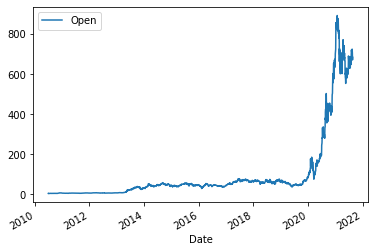

In [53]:
tesla_share_price_data.plot(x="Date", y="Open")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


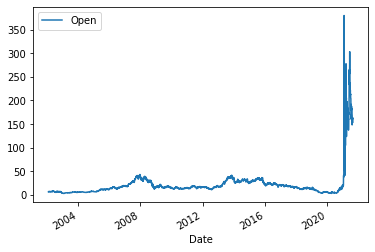

In [51]:
GME_data.plot(x="Date", y="Open")

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
